In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wIah112kjLlSBnmiuWxX")
project = rf.workspace("mask-5uvy1").project("new-mask-9vk80")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 119.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to new-mask-1 in yolov8:: 100%|██████████| 222/222 [00:00<00:00, 5253.44it/s]


In [3]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00


In [6]:
!yolo detect train data=/content/gdrive/MyDrive/yoloMaskTrain/data.yaml model=yolov8s.pt epochs=100

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/yoloMaskTrain/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

In [4]:
from ultralytics import YOLO
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model.predict(source='/content/gdrive/MyDrive/yoloMaskTrain/test/images', save=True)


image 1/10 /content/gdrive/MyDrive/yoloMaskTrain/test/images/1029731146_jpg.rf.86cf467d4c2d6eae13a3823453dbdbaa.jpg: 352x640 2 Unmaskeds, 4 maskeds, 43.3ms
image 2/10 /content/gdrive/MyDrive/yoloMaskTrain/test/images/1125506397_15801322206131n_jpg.rf.abc5ba304fe81c5a3a1beb2731fb8d18.jpg: 448x640 1 Unmasked, 4 maskeds, 42.6ms
image 3/10 /content/gdrive/MyDrive/yoloMaskTrain/test/images/1125506397_15801322207071n_jpg.rf.702120c569bd0433fc0ee6c71be3d0fa.jpg: 480x640 7 maskeds, 42.4ms
image 4/10 /content/gdrive/MyDrive/yoloMaskTrain/test/images/135e-huxwryw6451820_jpg.rf.c7d1e2733908c688755bad530f598d44.jpg: 640x448 1 masked, 56.5ms
image 5/10 /content/gdrive/MyDrive/yoloMaskTrain/test/images/1580053154-5839_jpg.rf.37e199134483c0c5a3a4acf67480d884.jpg: 448x640 9 maskeds, 13.5ms
image 6/10 /content/gdrive/MyDrive/yoloMaskTrain/test/images/Smog-Mask-PM2-5-Carbon-Filter-Face-Masks-Fog-Dust-Air-Cleaner-anti-pollution-Face-Protector_jpg.rf.da1f7bdf72d3a030f9d598e95048c1f6.jpg: 576x640 3 Unmask

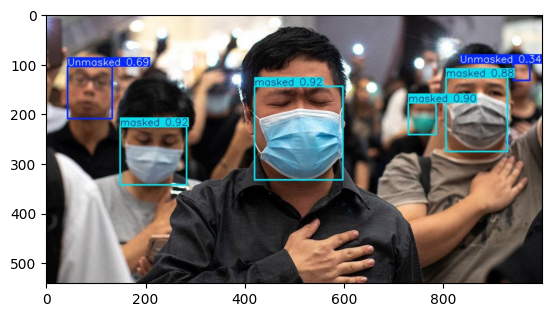

In [14]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/content/runs/detect/predict/1029731146_jpg.rf.86cf467d4c2d6eae13a3823453dbdbaa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [15]:
target_labels = ['Unmasked', 'masked']
cap = cv2.VideoCapture('/content/gdrive/MyDrive/yoloMaskTrain/input.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')    ## set mp4 video mode
fps = int(cap.get(cv2.CAP_PROP_FPS))        ##  read framerate
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  ## read frame width
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) ## read frame height

# Output video writer
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

while cap.isOpened():                       ### read each frame in video
    ret, frame = cap.read()
    if not ret:
        break

                                                # Run YOLO inference
    results = model(frame)

    # Draw annotations
    annotated_frame = results[0].plot()        ## draw detected objects to output frame

    # Write frame to output video
    out.write(annotated_frame)                 ## write to output video

cap.release()                                 ## close input video
out.release()



0: 384x640 10 maskeds, 12.2ms
Speed: 5.5ms preprocess, 12.2ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 maskeds, 10.8ms
Speed: 5.8ms preprocess, 10.8ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 maskeds, 10.7ms
Speed: 3.2ms preprocess, 10.7ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 maskeds, 10.8ms
Speed: 3.3ms preprocess, 10.8ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 maskeds, 10.7ms
Speed: 3.8ms preprocess, 10.7ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 maskeds, 10.9ms
Speed: 5.1ms preprocess, 10.9ms inference, 7.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 maskeds, 11.7ms
Speed: 3.1ms preprocess, 11.7ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 maskeds, 10.8ms
Speed: 3.1ms preprocess, 10.8ms inference, 4.8ms postprocess per image at shap